In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# ***Data Loading***

In [ ]:
df = pd.read_csv('/content/e_commerce_cosmetic.csv', encoding='latin1')


In [ ]:
df.head()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342


In [ ]:
df.tail()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
12610,Bright Future - Smoothing & Brightening Concea...,Sephora,India,face,concealer,https://sephora.nnnow.com/mac-cosmetics-prep--...,1900.0,MAC Cosmetics,"Water\Aqua\Eau, Glycerin, Butylene Glycol, Toc...",cream,"Combination, Dry, Oily, Normal",Pinklite,100,3.15,14
12611,Bright Future - Smoothing & Brightening Concea...,Sephora,India,face,concealer,https://sephora.nnnow.com/mac-cosmetics-prep--...,2150.0,MAC Cosmetics,"Water\Aqua\Eau, Cyclopentasiloxane, Dimethicon...",cream,"Combination, Dry, Oily, Normal",No colour,100,3.13,13
12612,Starlaa Rosy Bronze Blush Mini,Sephora,India,face,blush,https://sephora.nnnow.com/klara-cosmetics-wome...,3040.0,Klara Cosmetics,"Talc, Ethylhexyl Palmitate, Octyldodecanol, Sy...",powder,"Combination, Oily, Normal, Dry",Selfie Queen,110,4.03,96
12613,Terra Golden Brick Red Blush Travel Size Mini,Sephora,India,face,blush,https://sephora.nnnow.com/clinique-women-clini...,2950.0,CLINIQUE,"Water\Aqua\Eau, Dimethicone, Isododecane, Buty...",liquid,"Combination, Dry, Oily, Normal",All,115,3.15,15
12614,Peachin' Golden Peach Blush Travel Size Mini,Sephora,India,face,blush,https://sephora.nnnow.com/lancome-clarifique-d...,5850.0,Lancme,"Aqua / Water, Alcohol Denat., Glycolic Acid, B...",serum,"Combination, Dry, Normal, Oily",No colour,150,3.16,16


# ***Data Preprocessing***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title-href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         10626 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [ ]:
df.drop(['title-href'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   price         12298 non-null  float64
 6   brand         12615 non-null  object 
 7   ingredients   6600 non-null   object 
 8   form          12615 non-null  object 
 9   type          9934 non-null   object 
 10  color         10626 non-null  object 
 11  size          9449 non-null   object 
 12  rating        10548 non-null  object 
 13  noofratings   12156 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.3+ MB


In [ ]:
df.shape

(12615, 14)

In [ ]:
df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
price,317
brand,0
ingredients,6015
form,0
type,2681


In [ ]:
df['price'].unique()

array([ 599.,  149.,  298., ..., 3690., 6502., 3040.])

In [ ]:
df['price'].fillna(df['price'].median(), inplace=True)

/tmp/ipython-input-1576110267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


In [ ]:
df['price'].unique()

array([ 599.,  149.,  298., ..., 3690., 6502., 3040.])

In [ ]:

df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
price,0
brand,0
ingredients,6015
form,0
type,2681


In [ ]:
df.dtypes

,0
product_name,object
website,object
country,object
category,object
subcategory,object
price,float64
brand,object
ingredients,object
form,object
type,object


In [ ]:
df['ingredients'].unique()

array([nan,
       'Pottasium Lauryl Sulfate, Disodium Lauryl Sulfosuccinate, Corn (Zea Mays) Starch, Cetearyl Alcohol, Stearic acid, Aqua (Water), Sodiumchlorid, Sodium Sulfate, Citric Acid, Titanium Dioxide, Magnesiumcarbonat, Silt (Dead Sea Mud), Parfum (Fragrance).',
       '100% Dead Sea salt', ...,
       'Water\\Aqua\\Eau, Glycerin, Butylene Glycol, Tocopheryl Acetate, Caffeine, Camellia Sinensis (Green Tea) Leaf Extract, Chamomilla Recutita (Matricaria) Extract, Cucumis Sativus (Cucumber) Fruit Extract, Arginine, Ppg-26-Buteth-26, Peg-40 Hydrogenated Castor Oil, Silica, Panthenol, Fragrance (Parfum), Disodium Edta, Phenoxyethanol, Sodium Dehydroacetate, [+/- Mica, Titanium Dioxide (Ci 77891), Iron Oxides (Ci 77491), Iron Oxides (Ci 77492), Iron Oxides (Ci 77499)] <ILN44933>',
       "Water\\Aqua\\Eau, Dimethicone, Isododecane, Butylene Glycol, Bis-Peg-18 Methyl Ether Dimethyl Silane, Glycerin, Saccharomyces Lysate Extract, Laminaria Saccharina Extract, Polygonum Cuspidatum Root

In [ ]:
df['ingredients'].fillna('Not Specified', inplace=True)

/tmp/ipython-input-1333796986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ingredients'].fillna('Not Specified', inplace=True)


In [ ]:
print("=== INGREDIENTS CHECK ===")
print(f"Total rows: {len(df)}")
print(f"'Not Specified' values: {(df['ingredients'] == 'Not Specified').sum()}")
print(f"Sample values:\n{df['ingredients'].value_counts().head()}")

=== INGREDIENTS CHECK ===
Total rows: 12615
'Not Specified' values: 6015
Sample values:
ingredients
Not Specified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   6015
Avocado , Resins, Jellifying Agents, Vitamin E, Isododecane, Dimethicone, Trimethylsiloxysilicate, Polybutene, Petrolatum, Cyclohexasiloxane, K

In [ ]:
df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
price,0
brand,0
ingredients,0
form,0
type,2681


In [ ]:
df['type'].unique()

array([nan, 'all', 'combinational,dry,sensitive,normal',
       'combination, dry, normal, oily', 'combinational,normal',
       'combinational', 'sensitive', 'combinational,oily,normal',
       'dry,combinational,normal', 'semi-matte', 'satin', 'matte',
       'luminous', 'glossy', 'smooth', 'natural', 'shimmer', 'powder',
       'metallic', 'creme', 'sheer', 'multi', 'enamel', 'tempered glass',
       'Medium, Full', 'normal', 'dry', 'hairfall', 'damaged', 'oily',
       'dull', 'dandruff', 'curly', 'dry, normal', 'wavy,curly, curly',
       'dry, frizzy', 'straight', 'frizzy', 'dry, damaged',
       'fine, damaged', 'dull, damaged', 'long', 'wavy',
       'wavy,straight,curly', 'wavy,straight', 'oily, normal',
       'wavy,curly', 'dry, damaged, dull, frizzy, normal',
       'damaged, hairfall', 'dry, normal, damaged', 'thick', 'fine',
       'curly,wavy,straight', 'colored', 'oily, wavy, dry, normal',
       'multicultural', 'damaged, dry', 'dry, curly, damaged',
       'combinatio

In [ ]:
df['type'].fillna(df['type'].mode()[0], inplace=True)

/tmp/ipython-input-3767612138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna(df['type'].mode()[0], inplace=True)


In [ ]:
df['type'].unique()

array(['all', 'combinational,dry,sensitive,normal',
       'combination, dry, normal, oily', 'combinational,normal',
       'combinational', 'sensitive', 'combinational,oily,normal',
       'dry,combinational,normal', 'semi-matte', 'satin', 'matte',
       'luminous', 'glossy', 'smooth', 'natural', 'shimmer', 'powder',
       'metallic', 'creme', 'sheer', 'multi', 'enamel', 'tempered glass',
       'Medium, Full', 'normal', 'dry', 'hairfall', 'damaged', 'oily',
       'dull', 'dandruff', 'curly', 'dry, normal', 'wavy,curly, curly',
       'dry, frizzy', 'straight', 'frizzy', 'dry, damaged',
       'fine, damaged', 'dull, damaged', 'long', 'wavy',
       'wavy,straight,curly', 'wavy,straight', 'oily, normal',
       'wavy,curly', 'dry, damaged, dull, frizzy, normal',
       'damaged, hairfall', 'dry, normal, damaged', 'thick', 'fine',
       'curly,wavy,straight', 'colored', 'oily, wavy, dry, normal',
       'multicultural', 'damaged, dry', 'dry, curly, damaged',
       'combination', '

In [ ]:
df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
price,0
brand,0
ingredients,0
form,0
type,0


In [ ]:
df['color'].unique()

array(['Top Note: Orange Blossom, Blackberry | Heart Note: Bitter Almond, Jasmine, Coffee | Base Note: Vanilla, Cedar, White Musk',
       'Unit count type:', 'Long-Lasting Scent', ..., 'Pinklite',
       '001 Universal', 'Selfie Queen'], dtype=object)

In [ ]:
df['color'].fillna(df['color'].mode()[0], inplace=True)

/tmp/ipython-input-3876112393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color'].fillna(df['color'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
price,0
brand,0
ingredients,0
form,0
type,0


In [ ]:
df['size'].unique()

array(['100', '30', '60', '70', '65', '150', '80', '220', '102', '255',
       '0', '204', '510', '960', '360', '456', '180', '405', '450', '480',
       '90', '270', '240', '120', '252', '111', '300', '0.21', '51',
       '201', '174', '156', '210', '540', '720', '1020', '1440', '570',
       '135', '525', '390', '507', '303', '105', '264.6', '261', '3.9',
       '192.6', '202.8', '219', '420', '1.2', '990', '290', '63', '231',
       '99', '528', '253.5', '10.5', '3', '0.42', '549', '24', '393',
       '582', '1014.3', '1.26', '600', '264', '159', '304.2', '243.3',
       '315', '126', '339', '192', '1.05', '400', '50.00 count', '1.47',
       '6.3', '207.3', '759', '291', '243', '345', '101.1', '132', '144',
       '147', '45', '48', '1014', '630', '211.5', '750', '250', nan,
       '500', '177', '4.2', '280', '1', '50', '130', '200', '125', '236',
       '29', '15', '260', '1000', '275', '40', '20', '2.5 Fluid Ounces',
       '16', '8', '32', '9', '9.9', '40.5', '75', '50.7', '101'

In [ ]:
df['size'].fillna(df['size'].mode()[0], inplace=True)

/tmp/ipython-input-4043685713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna(df['size'].mode()[0], inplace=True)


In [ ]:
df['size'].unique()

array(['100', '30', '60', '70', '65', '150', '80', '220', '102', '255',
       '0', '204', '510', '960', '360', '456', '180', '405', '450', '480',
       '90', '270', '240', '120', '252', '111', '300', '0.21', '51',
       '201', '174', '156', '210', '540', '720', '1020', '1440', '570',
       '135', '525', '390', '507', '303', '105', '264.6', '261', '3.9',
       '192.6', '202.8', '219', '420', '1.2', '990', '290', '63', '231',
       '99', '528', '253.5', '10.5', '3', '0.42', '549', '24', '393',
       '582', '1014.3', '1.26', '600', '264', '159', '304.2', '243.3',
       '315', '126', '339', '192', '1.05', '400', '50.00 count', '1.47',
       '6.3', '207.3', '759', '291', '243', '345', '101.1', '132', '144',
       '147', '45', '48', '1014', '630', '211.5', '750', '250', '500',
       '177', '4.2', '280', '1', '50', '130', '200', '125', '236', '29',
       '15', '260', '1000', '275', '40', '20', '2.5 Fluid Ounces', '16',
       '8', '32', '9', '9.9', '40.5', '75', '50.7', '101', '15

In [ ]:
df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
price,0
brand,0
ingredients,0
form,0
type,0


In [ ]:
df.dtypes

,0
product_name,object
website,object
country,object
category,object
subcategory,object
price,float64
brand,object
ingredients,object
form,object
type,object


In [ ]:
df['rating'].unique()

array(['3.9', '4.4', '4.2', '4.3', '4.5', '4.1', '4.7', '4', nan, '4.8',
       '4.6', '4.9', '3.7', '3', '5', '2.9', '3.6', '2.5', '3.2', '3.3',
       '3.8', '1', '3.4', '3.1', '134', '122', '2.4', '2.1', '427', '100',
       '2.3', '2', '3.5', '925', '14,338', '5.1', '1,374', '2,716', '109',
       '254', '296', '474', '244', '20', '4.14', '4.29', '42', '4,257',
       '895', '4.37', '4.18', '4.22', '4.21', '4.23', '4.19', '4.34',
       '155', '44', '2,272', '4.13', '52', '1,201', '116', '4.15', '4.27',
       '4.41', '4.51', '19,721', '1,875', '7,468', '2,595', '2,358',
       '2,199', '536', '41', '25', '251', '506', '173', '1,379', '676',
       '54', '53', '85', '4.07', '4.42', '4.33', '4.11', '4.24', '4.02',
       '4.35', '4.09', '4.17', '4.28', '4.26', '4.08', '4.16', '4.12',
       '4.05', '4.01', '4.06', '1.7', '4.39', '4.32', '4.87', '6', '4.61',
       '5.11', '4.25', '4.04', '4.31', '4.53', '4.76', '4.43', '4.03',
       '4.77', '4.38', '2.7', '4.45', '4.65', '4.47', '2

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'] = df['rating'].clip(lower=1.0, upper=5.0)
df['rating'].fillna(df['rating'].mean(), inplace=True)

/tmp/ipython-input-3847505712.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)


In [ ]:
df['noofratings'].unique()

array(['19', '4,031', '4,072', ..., '6360', '2140', '587'], dtype=object)

In [ ]:
df['noofratings'] = pd.to_numeric(df['noofratings'], errors='coerce')
df['noofratings'].fillna(df['noofratings'].median(), inplace=True)

/tmp/ipython-input-3988714554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['noofratings'].fillna(df['noofratings'].median(), inplace=True)


In [ ]:
# CHECK BOTH COLUMNS
print("=== RATING CHECK ===")
print(f"Data type: {df['rating'].dtype}")
print(f"Null values: {df['rating'].isnull().sum()}")
print(f"Min: {df['rating'].min()}, Max: {df['rating'].max()}")
print(f"Mean: {df['rating'].mean():.2f}")
print(f"Sample values: {df['rating'].head(10).tolist()}")

print("\n=== NOOFRATINGS CHECK ===")
print(f"Data type: {df['noofratings'].dtype}")
print(f"Null values: {df['noofratings'].isnull().sum()}")
print(f"Min: {df['noofratings'].min()}, Max: {df['noofratings'].max()}")
print(f"Median: {df['noofratings'].median()}")
print(f"Sample values: {df['noofratings'].head(10).tolist()}")

=== RATING CHECK ===
Data type: float64
Null values: 0
Min: 1.0, Max: 5.0
Mean: 4.14
Sample values: [3.9, 4.4, 4.4, 4.2, 4.3, 4.4, 4.3, 4.5, 4.3, 4.2]

=== NOOFRATINGS CHECK ===
Data type: float64
Null values: 0
Min: 0.0, Max: 129408.0
Median: 28.0
Sample values: [19.0, 28.0, 28.0, 61.0, 342.0, 28.0, 515.0, 28.0, 54.0, 842.0]


# ***Data Visulization***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sna

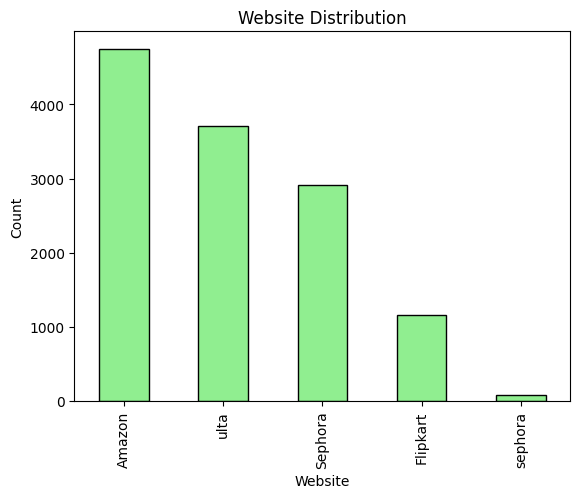

In [ ]:
df['website'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Website Distribution")
plt.xlabel('Website')
plt.ylabel('Count')
plt.show()

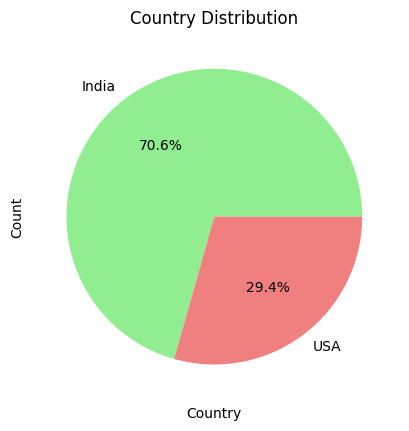

In [ ]:
df['country'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

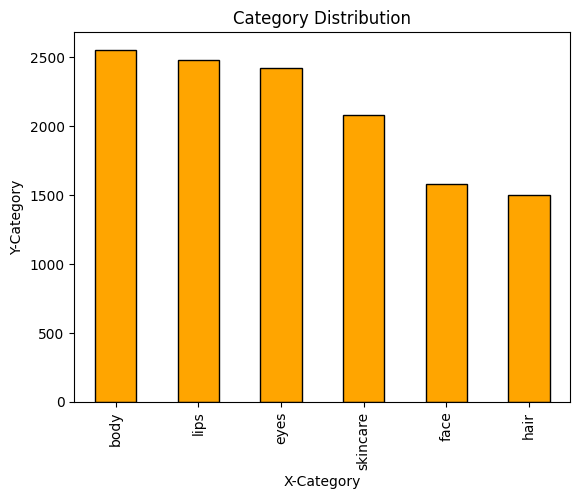

In [ ]:
df['category'].value_counts().plot(kind='bar', color='orange', edgecolor=['black'])
plt.title('Category Distribution')
plt.xlabel('X-Category')
plt.ylabel('Y-Category')
plt.show()

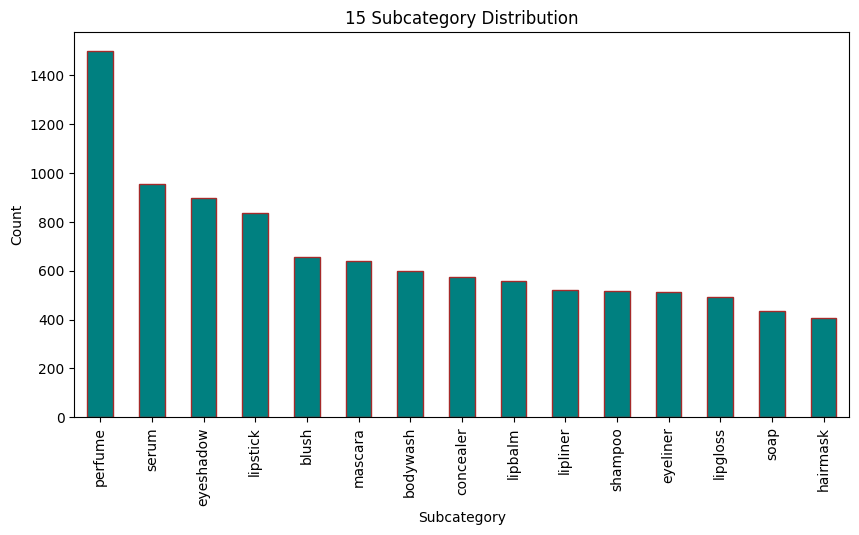

In [ ]:
plt.figure(figsize=(10,5))
df['subcategory'].value_counts().head(15).plot(kind='bar', color='teal', edgecolor='brown')
plt.title('15 Subcategory Distribution')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.show()

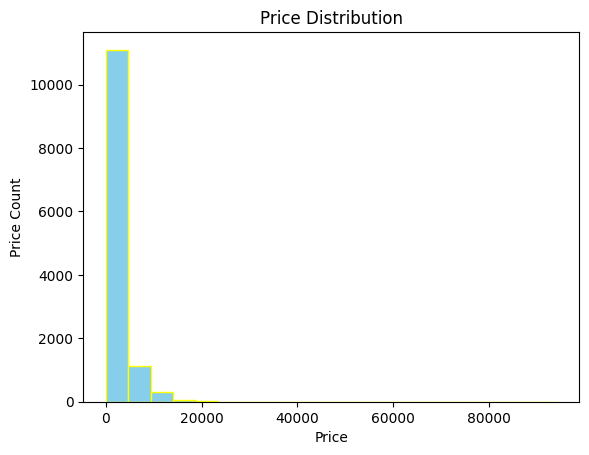

In [ ]:
plt.hist(df['price'], bins=20, color='skyblue', edgecolor=['yellow'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Price Count')
plt.show()

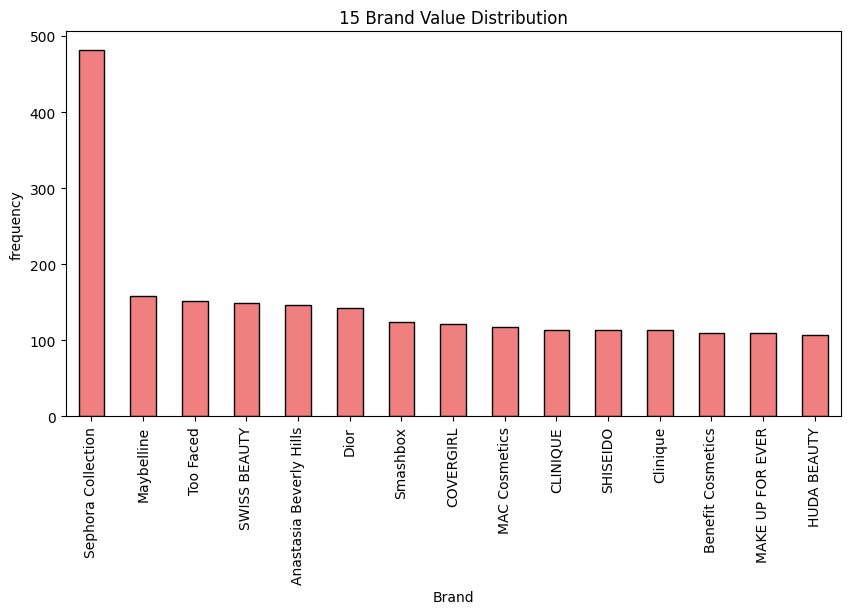

In [ ]:
plt.figure(figsize=(10,5))
df['brand'].value_counts().head(15).plot(kind='bar', color='lightcoral', edgecolor=['black'])
plt.title('15 Brand Value Distribution')
plt.xlabel('Brand')
plt.ylabel('frequency')
plt.show()

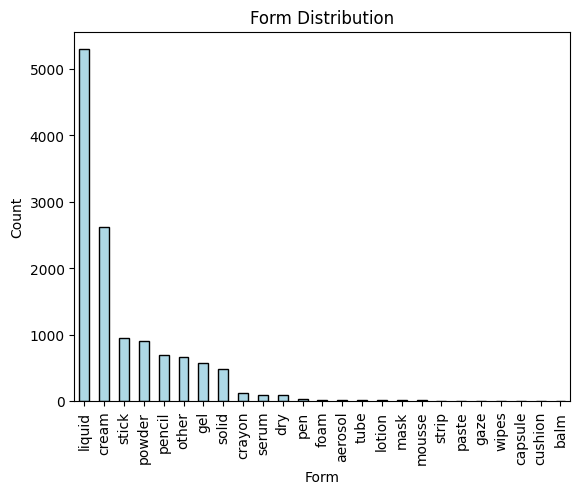

In [ ]:
df['form'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Form Distribution")
plt.xlabel('Form')
plt.ylabel('Count')
plt.show()

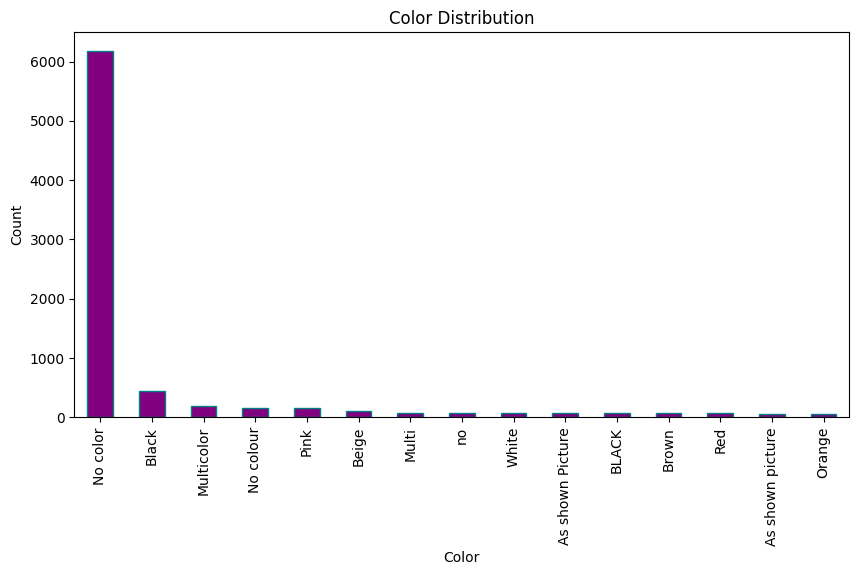

In [ ]:
plt.figure(figsize=(10,5))
df['color'].value_counts().head(15).plot(kind='bar', color='purple', edgecolor=['teal'])
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

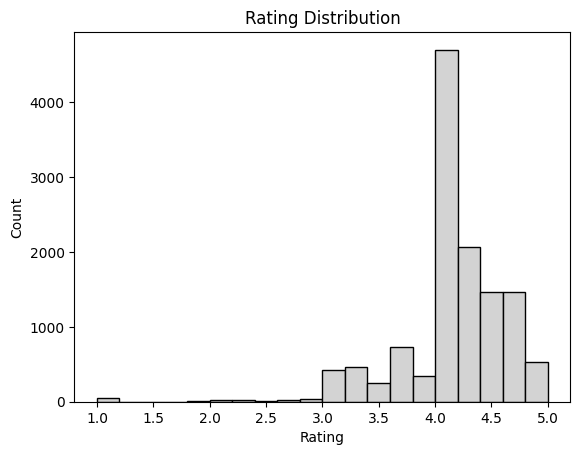

In [ ]:
plt.hist(df['rating'], bins=20, color='lightgray', edgecolor='black')
plt.title("Rating Distribution")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

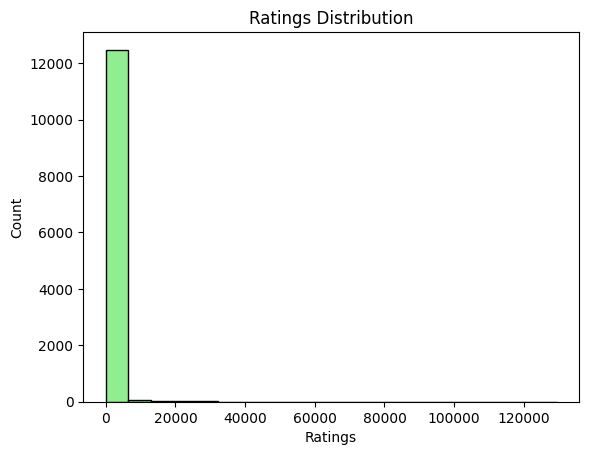

In [ ]:
plt.hist(df['noofratings'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Ratings Distribution")
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

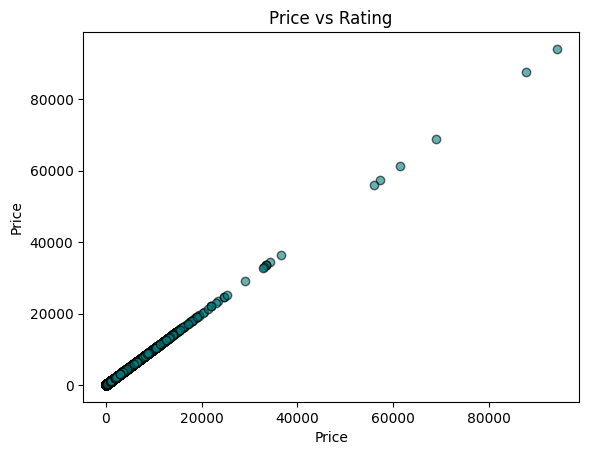

In [ ]:
plt.scatter(df['price'],df['price'], alpha=0.6, color=['teal'], edgecolor=['black'])
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

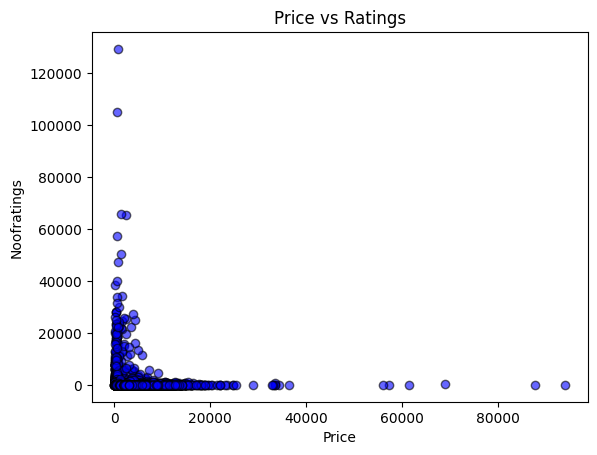

In [ ]:
plt.scatter(df['price'], df['noofratings'], alpha=0.6, color='blue', edgecolor='black')
plt.title("Price vs Ratings")
plt.xlabel('Price')
plt.ylabel('Noofratings')
plt.show()

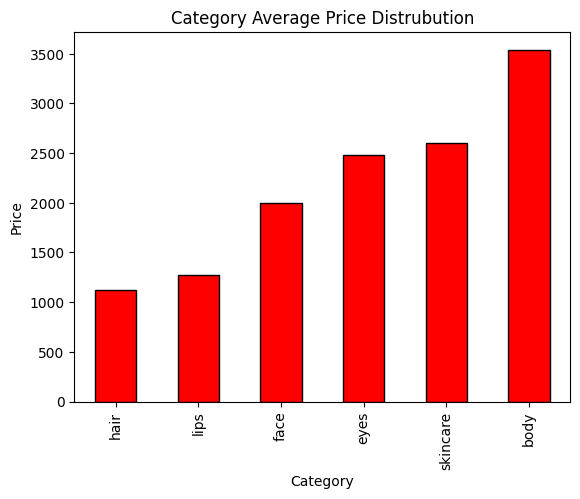

In [ ]:
df.groupby('category')['price'].mean().sort_values().plot(kind='bar', color='red', edgecolor=['black'])
plt.title('Category Average Price Distrubution')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

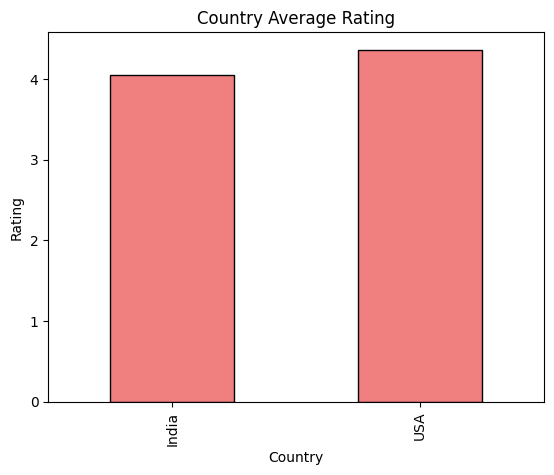

In [ ]:
df.groupby('country')['rating'].mean().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Country Average Rating")
plt.xlabel('Country')
plt.ylabel('Rating')
plt.show()

In [ ]:
df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
price,0
brand,0
ingredients,0
form,0
type,0


In [ ]:
df.dtypes

,0
product_name,object
website,object
country,object
category,object
subcategory,object
price,float64
brand,object
ingredients,object
form,object
type,object


# ***Text To Numeric Conversion***

In [ ]:
label_encod = LabelEncoder()

In [ ]:
df['product_name'] = label_encod.fit_transform(df['product_name'])

In [ ]:
df['website'] = label_encod.fit_transform(df['website'])

In [ ]:
df["country"].unique()

array(['India', 'USA'], dtype=object)

In [ ]:
df['country'] = label_encod.fit_transform(df['country'])

In [ ]:
# country_encode = pd.get_dummies(df['country'], prefix='country')
# df = pd.concat([df, country_encode], axis=1)
# df.drop('country', axis=1, inplace=True)

In [ ]:
df["category"].unique()

array(['body', 'eyes', 'face', 'hair', 'lips', 'skincare'], dtype=object)

In [ ]:
df['category'] = label_encod.fit_transform(df['category'])

In [ ]:
df["category"].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
# category_encode = pd.get_dummies(df['category'], prefix='category')
# df = pd.concat([df, category_encode], axis=1)
# df.drop('category', axis=1, inplace=True)

In [ ]:
df['subcategory'] = label_encod.fit_transform(df['subcategory'])

In [ ]:
df['brand'] = label_encod.fit_transform(df['brand'])

In [ ]:
df['ingredients'] = label_encod.fit_transform(df['ingredients'])

In [ ]:
df["form"].unique()

array(['aerosol', 'cream', 'foam', 'gel', 'liquid', 'lotion', 'solid',
       'other', 'capsule', 'crayon', 'gaze', 'pen', 'pencil', 'powder',
       'stick', 'strip', 'dry', 'mask', 'paste', 'mousse', 'tube',
       'wipes', 'cushion', 'balm', 'serum'], dtype=object)

In [ ]:
df['form'] = label_encod.fit_transform(df['form'])
df['form'].unique()

array([ 0,  4,  7,  9, 10, 11, 20, 14,  2,  3,  8, 16, 17, 18, 21, 22,  6,
       12, 15, 13, 23, 24,  5,  1, 19])

In [ ]:
df['type'].unique()

array(['all', 'combinational,dry,sensitive,normal',
       'combination, dry, normal, oily', 'combinational,normal',
       'combinational', 'sensitive', 'combinational,oily,normal',
       'dry,combinational,normal', 'semi-matte', 'satin', 'matte',
       'luminous', 'glossy', 'smooth', 'natural', 'shimmer', 'powder',
       'metallic', 'creme', 'sheer', 'multi', 'enamel', 'tempered glass',
       'Medium, Full', 'normal', 'dry', 'hairfall', 'damaged', 'oily',
       'dull', 'dandruff', 'curly', 'dry, normal', 'wavy,curly, curly',
       'dry, frizzy', 'straight', 'frizzy', 'dry, damaged',
       'fine, damaged', 'dull, damaged', 'long', 'wavy',
       'wavy,straight,curly', 'wavy,straight', 'oily, normal',
       'wavy,curly', 'dry, damaged, dull, frizzy, normal',
       'damaged, hairfall', 'dry, normal, damaged', 'thick', 'fine',
       'curly,wavy,straight', 'colored', 'oily, wavy, dry, normal',
       'multicultural', 'damaged, dry', 'dry, curly, damaged',
       'combination', '

In [ ]:
df['type'] = label_encod.fit_transform(df['type'])


In [ ]:
df['type'].unique()

array([ 37,  51,  42,  53,  49, 112,  55,  75, 111, 110,  96,  95,  91,
       124, 100, 123, 109,  97,  60, 122,  98,  87, 126,  23, 101,  67,
        92,  63, 102,  85,  66,  61,  72, 130,  71, 125,  90,  69,  89,
        86,  94, 128, 132, 131, 106, 129,  70,  65,  73, 127,  88,  62,
        38, 107,  99,  64,  68,  39,  40,  41,  59,  93, 103,  43, 104,
       105,  78,  54,  82,  81,  77,  58,  84, 120,  74,  76,  80,  52,
        56,  50,  57, 108, 121, 118, 113, 116, 115, 117,  83, 119, 114,
        14,  22,  18,  19,  24,   2,  17,  25,   4,   3,  20,  16,  35,
         0,  27,   1,  36,  15,  34,  21,  13,  26,  45,  44,  47,  48,
        79,  46,   8,   5,  30,   6,   7,   9,  12,  31,  33,  28,  11,
        10,  32,  29])

In [ ]:
# form_encod = pd.get_dummies(df['type'], prefix='type')
# df = pd.concat([df, form_encod], axis=1)
# df.drop('type', axis=1, inplace=True)

In [ ]:
df['color'] = label_encod.fit_transform(df['color'])

In [ ]:
df['size'] = label_encod.fit_transform(df['size'])

In [ ]:
df.shape

(12615, 14)

In [ ]:
df.dtypes

,0
product_name,int64
website,int64
country,int64
category,int64
subcategory,int64
price,float64
brand,int64
ingredients,int64
form,int64
type,int64


In [ ]:
df.dtypes

,0
product_name,int64
website,int64
country,int64
category,int64
subcategory,int64
price,float64
brand,int64
ingredients,int64
form,int64
type,int64


# ***Data Spliting***

In [ ]:
x = df[['website', 'country', 'category', 'subcategory', 'price',
 'brand', 'ingredients', 'form', 'type', 'color', 'size', 'noofratings']]


In [ ]:
x

,website,country,category,subcategory,price,brand,ingredients,form,type,color,size,noofratings
0,1,0,0,27,599.0,287,2898,0,37,3136,202,19.0
1,1,0,0,27,149.0,299,2898,0,37,3184,459,28.0
2,1,0,0,27,298.0,299,2898,0,37,3184,459,28.0
3,1,0,0,27,245.0,398,2898,0,37,1952,603,61.0
4,1,0,0,27,422.0,398,2898,0,37,1952,202,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12610,2,0,2,3,1900.0,928,4719,4,6,2560,202,14.0
12611,2,0,2,3,2150.0,928,4699,4,6,2297,202,13.0
12612,2,0,2,0,3040.0,824,3525,18,8,2819,223,96.0
12613,2,0,2,0,2950.0,266,4709,10,6,847,231,15.0


In [ ]:
y = df['rating']

In [ ]:
y

,rating
0,3.90
1,4.40
2,4.40
3,4.20
4,4.30
...,...
12610,3.15
12611,3.13
12612,4.03
12613,3.15


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train

,website,country,category,subcategory,price,brand,ingredients,form,type,color,size,noofratings
2108,1,0,0,32,199.0,186,2898,20,37,2296,284,24.0
2876,2,0,1,8,2590.0,189,802,9,100,1424,620,13.0
10538,1,0,5,30,395.0,1736,2898,10,37,2296,360,1530.0
6942,0,0,4,19,999.0,1377,2898,9,37,2163,459,4.0
4560,0,0,1,11,2342.0,245,2898,14,96,966,459,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2,0,2,0,2750.0,928,3580,18,5,2466,589,11.0
5191,0,0,3,15,298.5,1247,2898,4,37,2296,360,0.0
5390,0,0,3,31,33500.0,114,2898,9,37,2296,462,609.0
860,4,1,0,27,15931.5,256,575,10,37,2296,459,3.0


In [ ]:
y_train

,rating
2108,4.000000
2876,4.130000
10538,4.400000
6942,3.200000
4560,4.500000
...,...
11964,3.110000
5191,4.140704
5390,4.140704
860,5.000000


In [ ]:
x_test

,website,country,category,subcategory,price,brand,ingredients,form,type,color,size,noofratings
11699,0,0,2,0,412.00,1713,4826,18,37,1726,459,28.0
12138,2,0,2,0,1350.00,1461,4701,10,5,2854,193,33.0
12069,2,0,2,0,3600.00,1146,3528,18,30,2063,648,48.0
11440,0,0,2,0,179.00,1485,2898,18,37,2150,459,28.0
2450,1,0,0,32,600.00,1471,2898,20,37,2296,462,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1183,2,0,0,27,8750.00,568,502,10,37,2296,360,15.0
11334,0,0,2,3,499.00,844,2898,10,14,1591,459,28.0
5847,4,1,3,31,2778.48,843,4582,10,131,2296,466,14.0
7699,0,0,4,18,398.00,423,2898,17,101,1079,197,83.0


In [ ]:
y_test

,rating
11699,4.140704
12138,3.380000
12069,3.530000
11440,5.000000
2450,5.000000
...,...
1183,4.260000
11334,3.800000
5847,4.100000
7699,4.000000


# **Model TRaining and Model Building**

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

MAE: 0.2027, RMSE: 0.4072, R2: 0.3390


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

MAE: 0.2257, RMSE: 0.4111, R2: 0.3263
